In [1]:
import pandas as pd
import matplotlib.pyplot as plt
game = pd.read_csv('for_prediction.csv')

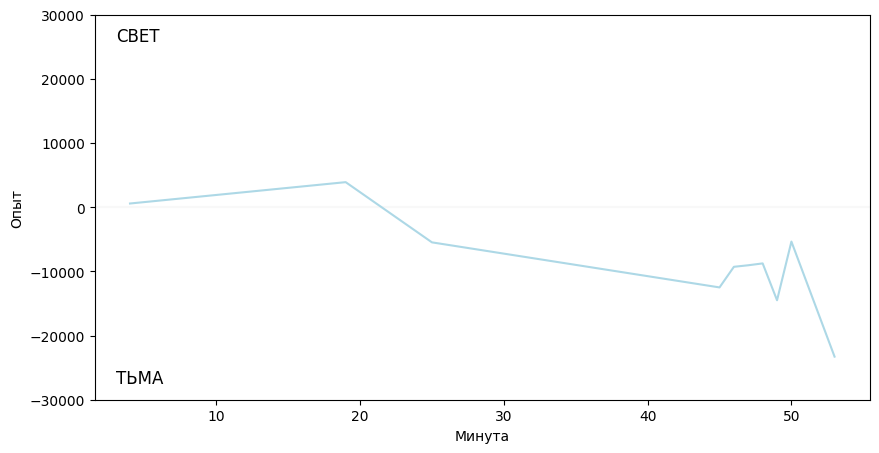

In [45]:
game = game.sort_values('currentMinute').reset_index(drop=True)
plt.figure(figsize=(10, 5))
plt.xlabel("Минута")
plt.ylabel("Опыт")
plt.axhline(color='gray', alpha=0.05)
plt.ylim(-30000, 30000)
plt.text(3, 28000, 'СВЕТ', fontsize=12, ha='left', va='top')
plt.text(3, -28000, 'ТЬМА', fontsize=12, ha='left', va='bottom')
plt.plot( game['currentMinute'], game['minuteRadiantExperienceLeads'], color='lightblue');


In [ ]:
from fastapi import FastAPI
from fastapi.responses import StreamingResponse
import matplotlib.pyplot as plt
from io import BytesIO

app = FastAPI()

@app.get("/plot")
def get_plot():
    # Создаем график с помощью Matplotlib
    plt.figure(figsize=(10, 5))
    plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
    plt.title("Test Plot")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")

    # Сохраняем график в байтовый поток вместо файла
    buf = BytesIO()
    plt.savefig(buf, format='png')
    plt.close()  # Закрываем фигуру, чтобы освободить память
    buf.seek(0)  # Перемещаем указатель в начало потока

    # Возвращаем поток в ответе
    return StreamingResponse(buf, media_type="image/png")
